In [1]:
import pandas as pd
import numpy as np
import torch
from torch.utils.tensorboard import SummaryWriter

In [4]:
data = pd.read_excel('GeneExpressionCancer_training.xlsx')
val_data = pd.read_excel('GeneExpressionCancer_validation.xlsx')

In [5]:

training = pd.read_excel('GeneExpressionCancer_training.xlsx')
test_data = pd.read_excel('GeneExpressionCancer_test.xlsx')
val_data = pd.read_excel('GeneExpressionCancer_validation.xlsx')

In [7]:
##### Set up the data and pre process

#Training data
training_data = training.iloc[0:8000,0:500]
training_label = training['CancerDiagnosed']


X= training_data
y = training_label.astype('category') # Transform into categorical


#Test data

X_test = test_data.iloc[0:1000,0:500]
y_test = test_data['CancerDiagnosed']
y_test = y_test.astype('category')



scaler = StandardScaler()
scaler.fit(X) # Scale the training data

StandardScaler()

In [18]:
import pandas as pd
import numpy as np
import torch
from sklearn.linear_model import LogisticRegression
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.metrics import RocCurveDisplay ,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from torch.utils.tensorboard import SummaryWriter

In [9]:

X_val = val_data.iloc[0:1000,0:500]
y_val = val_data['CancerDiagnosed']
y_val = y_val.astype('category')

optimal threshold test dataset:  0.5399358079370362


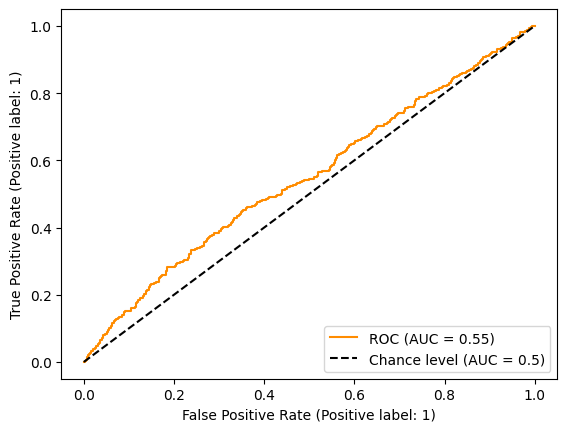

testing dataset
              precision    recall  f1-score   support

           0       0.50      0.59      0.54       502
           1       0.50      0.40      0.45       498

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.49      1000
weighted avg       0.50      0.50      0.49      1000

Sensitivity: 0.4036144578313253
Specificity: 0.5936254980079682


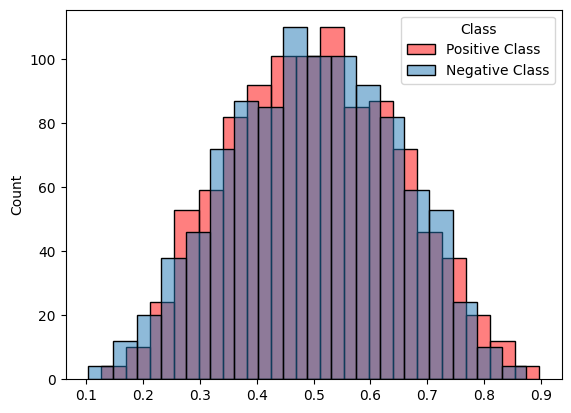

validation data
optimal threshold validation dataset:  0.44797289874608814
0.513
Sensitivity: 0.39558232931726905
Specificity: 0.6294820717131474
              precision    recall  f1-score   support

           0       0.51      0.63      0.56       502
           1       0.51      0.40      0.45       498

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.51      0.51      0.51      1000



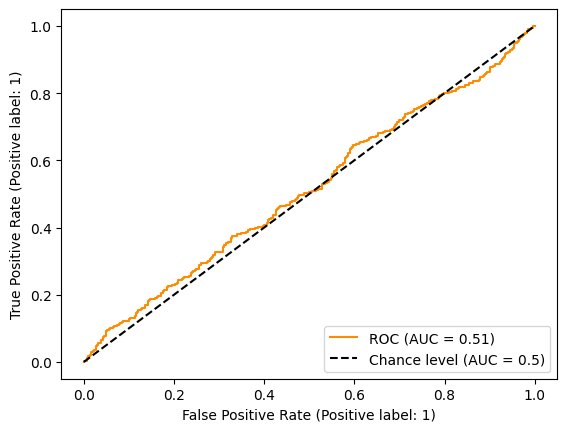

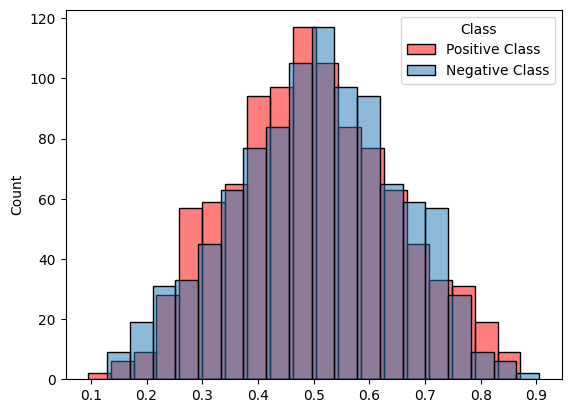

training
optimal threshold training dataset:  0.4916915841981895
0.610625
Sensitivity: 0.49899749373433583
Specificity: 0.7216957605985037
              precision    recall  f1-score   support

           0       0.59      0.72      0.65      4010
           1       0.64      0.50      0.56      3990

    accuracy                           0.61      8000
   macro avg       0.62      0.61      0.61      8000
weighted avg       0.62      0.61      0.61      8000



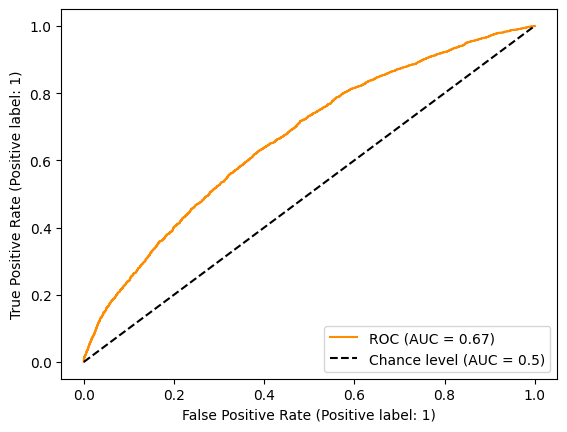

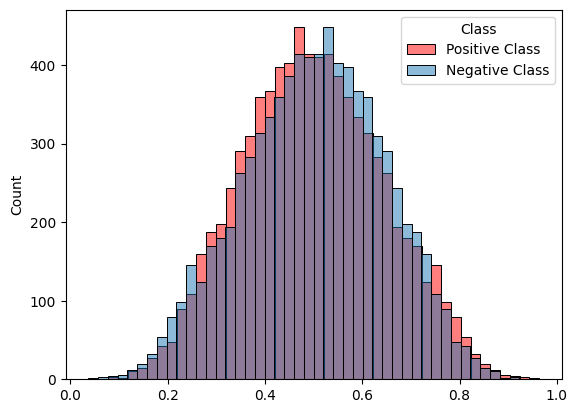

In [12]:
#Logistic model
logistic_model = LogisticRegression(max_iter= 1000)
logistic_model.fit(scaler.transform(X),y) 

predicted_probas = logistic_model.predict_proba(scaler.transform(X_test))[:,1] #Positive class probabilities

fpr, tpr, thresholds = roc_curve(y_test, predicted_probas) #Using test dataset

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx] #Optimal is 0.538
print('optimal threshold test dataset: ',optimal_threshold)

RocCurveDisplay.from_predictions(
    y_test,
    predicted_probas,
    name="ROC",
    color="darkorange",
    plot_chance_level=True,
)


plt.show()

#On testing dataset

print('testing dataset')

y_pred_new_threshold = (logistic_model.predict_proba(scaler.transform(X_test))[:, 1] >= 0.538).astype(int) 

accuracy_score(y_test, y_pred_new_threshold) # 0.546

print(classification_report(y_val, y_pred_new_threshold))

cm = confusion_matrix(y_val,y_pred_new_threshold)

TN, FP, FN, TP = cm.ravel()

# Sensitivity or True Positive Rate
sensitivity = TP / (TP + FN)

# Specificity or True Negative Rate
specificity = TN / (TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


        #probabilities of the positive label , test dataset

sns.histplot(predicted_probas, color='red', alpha=0.5, label='Positive Class') 

sns.histplot(logistic_model.predict_proba(scaler.transform(X_test))[:,0], alpha=0.5, label='Negative Class')


plt.legend(title='Class')
plt.show()





# On validatioon dataset

print('validation data')
training_data = training.iloc[0:8000,0:500]
training_label = training['CancerDiagnosed']


X= training_data
y = training_label.astype('category') # Transform into categorical




X_val = val_data.iloc[0:1000,0:500]
y_val = val_data['CancerDiagnosed']
y_val = y_val.astype('category')






logistic_model = LogisticRegression(max_iter= 1000)
logistic_model.fit(scaler.transform(X),y) 

predicted_probas = logistic_model.predict_proba(scaler.transform(X_val))[:,1] #Positive class probabilities

fpr, tpr, thresholds = roc_curve(y_val, predicted_probas) #Using validation dataset

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx] 
print('optimal threshold validation dataset: ',optimal_threshold) # 0.6939509754712332

y_pred_new_threshold = (logistic_model.predict_proba(scaler.transform(X_val))[:, 1] >= 0.538).astype(int) 

acc = accuracy_score(y_val, y_pred_new_threshold)
print(acc) #0.522



cm = confusion_matrix(y_val,y_pred_new_threshold)

TN, FP, FN, TP = cm.ravel()

# Sensitivity or True Positive Rate
sensitivity = TP / (TP + FN)

# Specificity or True Negative Rate
specificity = TN / (TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

print(classification_report(y_val, y_pred_new_threshold))



RocCurveDisplay.from_predictions(
    y_val,
    predicted_probas, #Validation predicted probabilities
    name="ROC",
    color="darkorange",
    plot_chance_level=True,
)

plt.show()


sns.histplot(predicted_probas, color='red', alpha=0.5, label='Positive Class') 

sns.histplot(logistic_model.predict_proba(scaler.transform(X_val))[:,0], alpha=0.5, label='Negative Class')


plt.legend(title='Class')
plt.show()





# Doing it on training dataset

print('training')


logistic_model = LogisticRegression(max_iter= 1000)
logistic_model.fit(scaler.transform(X),y) 

predicted_probas = logistic_model.predict_proba(scaler.transform(X))[:,1] #Positive class probabilities

fpr, tpr, thresholds = roc_curve(y, predicted_probas) #Using training dataset

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx] 
print('optimal threshold training dataset: ',optimal_threshold) 

y_pred_new_threshold = (logistic_model.predict_proba(scaler.transform(X))[:, 1] >= 0.538).astype(int) 

acc = accuracy_score(y, y_pred_new_threshold)
print(acc) #0.522



cm = confusion_matrix(y,y_pred_new_threshold)

TN, FP, FN, TP = cm.ravel()

# Sensitivity or True Positive Rate
sensitivity = TP / (TP + FN)

# Specificity or True Negative Rate
specificity = TN / (TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

print(classification_report(y, y_pred_new_threshold))



RocCurveDisplay.from_predictions(
    y,
    predicted_probas, #Validation predicted probabilities
    name="ROC",
    color="darkorange",
    plot_chance_level=True,
)

plt.show()


sns.histplot(predicted_probas, color='red', alpha=0.5, label='Positive Class') 

sns.histplot(logistic_model.predict_proba(scaler.transform(X))[:,0], alpha=0.5, label='Negative Class')


plt.legend(title='Class')
plt.show()




In [13]:
%load_ext tensorboard

In [23]:



class MyNetwork(torch.nn.Module):

    def __init__(self, nFeatures):
        super().__init__()

        self.nFeatures = nFeatures
        self.batchSize = 500
        self.testbatchSize = 100
        self.valbatchSize = 100
        self.learningRate = 0.01
        self.epochs = 250

        self.fc = torch.nn.Sequential(
            torch.nn.Linear(self.nFeatures, 20),
            torch.nn.ReLU(),
            torch.nn.Linear(20, 1),
            torch.nn.Sigmoid(),
        )

    def forward(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        return self.fc(x)
    
    def trainModel(self, trainData, trainLabels, validationData, validationLabels, logPath):
        # Configuring batches
        nTrainingSamples = trainData.shape[0]
        nTrainingBatches = nTrainingSamples // self.batchSize
        if nTrainingBatches * self.batchSize < nTrainingSamples:
            nTrainingBatches += 1

        nValidationSamples = validationData.shape[0]
        nValidationBatches = nValidationSamples // self.valbatchSize
        if nValidationBatches * self.valbatchSize < nValidationSamples:
            nValidationBatches += 1

        nTestingSamples = testData.shape[0]
        nTestingBatches = nTestingSamples // self.testbatchSize
        if nTestingBatches * self.testbatchSize < nValidationSamples:
            nTestingBatches += 1

        # Configuring device
        device = torch.device('cuda')
        self.to(device=device)

        # Configuring optimizer
        optimizer = torch.optim.SGD(self.parameters(), lr=self.learningRate)
        loss = torch.nn.BCELoss()

        # Creating logger
        writer = SummaryWriter(logPath)

        # Add model graph to TensorBoard
        sample_input_tensor = torch.randn(1, self.nFeatures, device=device)
        writer.add_graph(self, sample_input_tensor)

        # Training
        for epoch in range(self.epochs):
            self.train(mode=True)
            epochLoss = 0.0
            epochAccuracy = 0.0

            for batch in range(nTrainingBatches):
                optimizer.zero_grad()

                x = torch.tensor(trainData[batch*self.batchSize:(batch+1)*self.batchSize, :], 
                    device=device,
                    dtype=torch.float32
                )

                y = torch.tensor(trainLabels[batch*self.batchSize:(batch+1)*self.batchSize].reshape((-1,1)), 
                    device=device,
                    dtype=torch.float32
                )

                # Forward pass
                y_pred = self.fc(x)
                
                # Compute loss
                batchLoss = loss(y_pred, y)

                # Backpropagation
                batchLoss.backward()

                # Update parameters
                optimizer.step()

                # Accumulate loss
                epochLoss += batchLoss.item() * x.shape[0] / nTrainingSamples

                # Compute accuracy
                labels_pred = torch.round(y_pred)
                correct = (y == labels_pred).float()
                accuracy = correct.sum() / correct.numel()
                epochAccuracy += 100 * accuracy.item() * x.shape[0] / nTrainingSamples



            # Adding for loop for the validation dataset over the batches
            epochLoss_val = 0
            epochAccuracy_val = 0

            for batch in range(nValidationBatches):
                #Computer statistics on  and validation dataset
                self.eval()  # Set the model to evaluation mode
                with torch.no_grad():
                    x_val = torch.tensor(validationData[batch*self.valbatchSize:(batch+1)*self.valbatchSize, :], 
                                          device=device, 
                                          dtype=torch.float32)
                    y_val = torch.tensor(validationLabels[batch*self.valbatchSize:(batch+1)*self.valbatchSize].reshape((-1,1)), 
                                          device=device,
                                          dtype=torch.float32)

                    y_pred_val = self.fc(x_val)

                    # Loss on validation
                    batchLossval= loss(y_pred_val, y_val)
                    epochLoss_val += batchLossval.item() * x_val.shape[0] / nValidationSamples

                    # Accuracy on validation
                    labels_pred_val = torch.round(y_pred_val)
                    correct_test = (y_val == labels_pred_val).float()
                    epochAccuracy_val = 100 * correct_test.sum().item() / correct_test.numel()



            #Add for loop for the test dataset over the training batches
            epochLoss_test = 0
            epochAccuracy_test = 0

            for batch in range(nTestingBatches):
                #Computer statistics on  and validation dataset
                self.eval()  # Set the model to evaluation mode
                with torch.no_grad():
                    x_test = torch.tensor(testData[batch*self.testbatchSize:(batch+1)*self.testbatchSize, :], 
                                          device=device, 
                                          dtype=torch.float32)
                    y_test = torch.tensor(testLabels[batch*self.testbatchSize:(batch+1)*self.testbatchSize].reshape((-1,1)), 
                                          device=device,
                                          dtype=torch.float32)

                    y_pred_test = self.fc(x_test)

                    # Loss on validation
                    batchLosstest= loss(y_pred_test, y_test)
                    epochLoss_test += batchLosstest.item() * x_test.shape[0] / nTestingSamples

                    # Accuracy on validation
                    labels_pred_test = torch.round(y_pred_test)
                    correct_test = (y_test == labels_pred_test).float()
                    epochAccuracy_test = 100 * correct_test.sum().item() / correct_test.numel()

            #Will only print the training dataset statistics
            print(f'Epoch {epoch+1}/{self.epochs} - Loss: {epochLoss:.4f} - Accuracy: {epochAccuracy:.2f}%')
            
            # Validation
            writer.add_scalar('Accuracy/val', epochAccuracy_val, epoch)
            writer.add_scalar('Loss/val', epochLoss_val, epoch) # on validation

            # Training
            writer.add_scalar('Loss/train', epochLoss, epoch) # on validation
            writer.add_scalar('Accuracy/train', epochAccuracy, epoch) #on validation


            #Test dataset
            writer.add_scalar('Loss/test', epochLoss_test, epoch) # on validation
            writer.add_scalar('Accuracy/test', epochAccuracy_test, epoch) #on validation

        writer.close()

    def save(self, path):
        torch.save(self, path)



In [27]:

# Single layer
class MyNetwork(torch.nn.Module):

    def __init__(self, nFeatures):
        super().__init__()

        self.nFeatures = nFeatures
        self.batchSize = 500
        self.testbatchSize = 100
        self.valbatchSize = 100
        self.learningRate = 0.01
        self.epochs = 250

        self.fc = torch.nn.Sequential(
            torch.nn.Linear(self.nFeatures, 1),
            torch.nn.Sigmoid(),
        )

    def forward(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        return self.fc(x)
    
    def trainModel(self, trainData, trainLabels, validationData, validationLabels, logPath):
        # Configuring batches
        nTrainingSamples = trainData.shape[0]
        nTrainingBatches = nTrainingSamples // self.batchSize
        if nTrainingBatches * self.batchSize < nTrainingSamples:
            nTrainingBatches += 1

        nValidationSamples = validationData.shape[0]
        nValidationBatches = nValidationSamples // self.valbatchSize
        if nValidationBatches * self.valbatchSize < nValidationSamples:
            nValidationBatches += 1

        nTestingSamples = testData.shape[0]
        nTestingBatches = nTestingSamples // self.testbatchSize
        if nTestingBatches * self.testbatchSize < nValidationSamples:
            nTestingBatches += 1

        # Configuring device
        device = torch.device('cuda')
        self.to(device=device)

        # Configuring optimizer
        optimizer = torch.optim.SGD(self.parameters(), lr=self.learningRate)
        loss = torch.nn.BCELoss()

        # Creating logger
        writer = SummaryWriter(logPath)

        # Add model graph to TensorBoard
        sample_input_tensor = torch.randn(1, self.nFeatures, device=device)
        writer.add_graph(self, sample_input_tensor)

        # Training
        for epoch in range(self.epochs):
            self.train(mode=True)
            epochLoss = 0.0
            epochAccuracy = 0.0

            for batch in range(nTrainingBatches):
                optimizer.zero_grad()

                x = torch.tensor(trainData[batch*self.batchSize:(batch+1)*self.batchSize, :], 
                    device=device,
                    dtype=torch.float32
                )

                y = torch.tensor(trainLabels[batch*self.batchSize:(batch+1)*self.batchSize].reshape((-1,1)), 
                    device=device,
                    dtype=torch.float32
                )

                # Forward pass
                y_pred = self.fc(x)
                
                # Compute loss
                batchLoss = loss(y_pred, y)

                # Backpropagation
                batchLoss.backward()

                # Update parameters
                optimizer.step()

                # Accumulate loss
                epochLoss += batchLoss.item() * x.shape[0] / nTrainingSamples

                # Compute accuracy
                labels_pred = torch.round(y_pred)
                correct = (y == labels_pred).float()
                accuracy = correct.sum() / correct.numel()
                epochAccuracy += 100 * accuracy.item() * x.shape[0] / nTrainingSamples



            # Adding for loop for the validation dataset over the batches
            epochLoss_val = 0
            epochAccuracy_val = 0

            for batch in range(nValidationBatches):
                #Computer statistics on  and validation dataset
                self.eval()  # Set the model to evaluation mode
                with torch.no_grad():
                    x_val = torch.tensor(validationData[batch*self.valbatchSize:(batch+1)*self.valbatchSize, :], 
                                          device=device, 
                                          dtype=torch.float32)
                    y_val = torch.tensor(validationLabels[batch*self.valbatchSize:(batch+1)*self.valbatchSize].reshape((-1,1)), 
                                          device=device,
                                          dtype=torch.float32)

                    y_pred_val = self.fc(x_val)

                    # Loss on validation
                    batchLossval= loss(y_pred_val, y_val)
                    epochLoss_val += batchLossval.item() * x_val.shape[0] / nValidationSamples

                    # Accuracy on validation
                    labels_pred_val = torch.round(y_pred_val)
                    correct_test = (y_val == labels_pred_val).float()
                    epochAccuracy_val = 100 * correct_test.sum().item() / correct_test.numel()



            #Add for loop for the test dataset over the training batches
            epochLoss_test = 0
            epochAccuracy_test = 0

            for batch in range(nTestingBatches):
                #Computer statistics on  and validation dataset
                self.eval()  # Set the model to evaluation mode
                with torch.no_grad():
                    x_test = torch.tensor(testData[batch*self.testbatchSize:(batch+1)*self.testbatchSize, :], 
                                          device=device, 
                                          dtype=torch.float32)
                    y_test = torch.tensor(testLabels[batch*self.testbatchSize:(batch+1)*self.testbatchSize].reshape((-1,1)), 
                                          device=device,
                                          dtype=torch.float32)

                    y_pred_test = self.fc(x_test)

                    # Loss on validation
                    batchLosstest= loss(y_pred_test, y_test)
                    epochLoss_test += batchLosstest.item() * x_test.shape[0] / nTestingSamples

                    # Accuracy on validation
                    labels_pred_test = torch.round(y_pred_test)
                    correct_test = (y_test == labels_pred_test).float()
                    epochAccuracy_test = 100 * correct_test.sum().item() / correct_test.numel()

            #Will only print the training dataset statistics
            print(f'Epoch {epoch+1}/{self.epochs} - Loss: {epochLoss:.4f} - Accuracy: {epochAccuracy:.2f}%')
            
            # Validation
            writer.add_scalar('Accuracy/val', epochAccuracy_val, epoch)
            writer.add_scalar('Loss/val', epochLoss_val, epoch) # on validation

            # Training
            writer.add_scalar('Loss/train', epochLoss, epoch) # on validation
            writer.add_scalar('Accuracy/train', epochAccuracy, epoch) #on validation


            #Test dataset
            writer.add_scalar('Loss/test', epochLoss_test, epoch) # on validation
            writer.add_scalar('Accuracy/test', epochAccuracy_test, epoch) #on validation

        writer.close()

    def save(self, path):
        torch.save(self, path)

    def predict_proba(self, data):

        self.eval()  # Set the model to evaluation mode
        device = next(self.parameters()).device  # Use the same device as the model

        # Convert data to tensor and ensure it's on the correct device
        data_tensor = torch.tensor(data, dtype=torch.float32).to(device)

        with torch.no_grad():
            probabilities = self.forward(data_tensor)
            return probabilities.cpu().numpy()  # Convert to NumPy array for convenience

In [15]:
trainingData = pd.read_excel('GeneExpressionCancer_training.xlsx').to_numpy()
trainingLabels = trainingData[:, -1]
trainingData = trainingData[:, :-1]

validationData = pd.read_excel('GeneExpressionCancer_validation.xlsx').to_numpy()
validationLabels = validationData[:, -1]
validationData = validationData[:, :-1]

testData = pd.read_excel('GeneExpressionCancer_test.xlsx').to_numpy()
testLabels = testData[:, -1]
testData = testData[:, :-1]



In [ ]:
# Get the dimensions of the training data
training_data_shape = trainingData.shape
print("Training Data Dimensions:", training_data_shape)

# Get the dimensions of the validation data
validation_data_shape = validationData.shape
print("Validation Data Dimensions:", validation_data_shape)

# Get the dimensions of the test data
test_data_shape = testData.shape
print("Test Data Dimensions:", test_data_shape)

In [19]:
# Normalize data
scaler = StandardScaler()
trainingData = scaler.fit_transform(trainingData)
validationData = scaler.transform(validationData)
testData = scaler.transform(testData)

model = MyNetwork(trainingData.shape[1])
model.trainModel(trainingData, trainingLabels, validationData, validationLabels, 'log/MyNetwork')
model.save('FinalModel')

C:\Users\Juan\AppData\Local\Temp\ipykernel_23904\3646570589.py:20: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  x = torch.tensor(x, dtype=torch.float32)
C:\Users\Juan\AppData\Local\Temp\ipykernel_23904\3646570589.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)


Epoch 1/250 - Loss: 0.7394 - Accuracy: 48.36%
Epoch 2/250 - Loss: 0.7328 - Accuracy: 49.13%
Epoch 3/250 - Loss: 0.7268 - Accuracy: 49.61%
Epoch 4/250 - Loss: 0.7211 - Accuracy: 49.94%
Epoch 5/250 - Loss: 0.7159 - Accuracy: 50.38%
Epoch 6/250 - Loss: 0.7111 - Accuracy: 50.86%
Epoch 7/250 - Loss: 0.7067 - Accuracy: 51.54%
Epoch 8/250 - Loss: 0.7026 - Accuracy: 52.19%
Epoch 9/250 - Loss: 0.6988 - Accuracy: 52.91%
Epoch 10/250 - Loss: 0.6953 - Accuracy: 53.26%
Epoch 11/250 - Loss: 0.6921 - Accuracy: 53.71%
Epoch 12/250 - Loss: 0.6891 - Accuracy: 54.29%
Epoch 13/250 - Loss: 0.6863 - Accuracy: 54.83%
Epoch 14/250 - Loss: 0.6838 - Accuracy: 55.30%
Epoch 15/250 - Loss: 0.6814 - Accuracy: 55.91%
Epoch 16/250 - Loss: 0.6793 - Accuracy: 56.44%
Epoch 17/250 - Loss: 0.6772 - Accuracy: 56.83%
Epoch 18/250 - Loss: 0.6754 - Accuracy: 57.18%
Epoch 19/250 - Loss: 0.6737 - Accuracy: 57.75%
Epoch 20/250 - Loss: 0.6721 - Accuracy: 58.21%
Epoch 21/250 - Loss: 0.6706 - Accuracy: 58.66%
Epoch 22/250 - Loss: 0

C:\Users\Juan\AppData\Local\Temp\ipykernel_23904\3646570589.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)


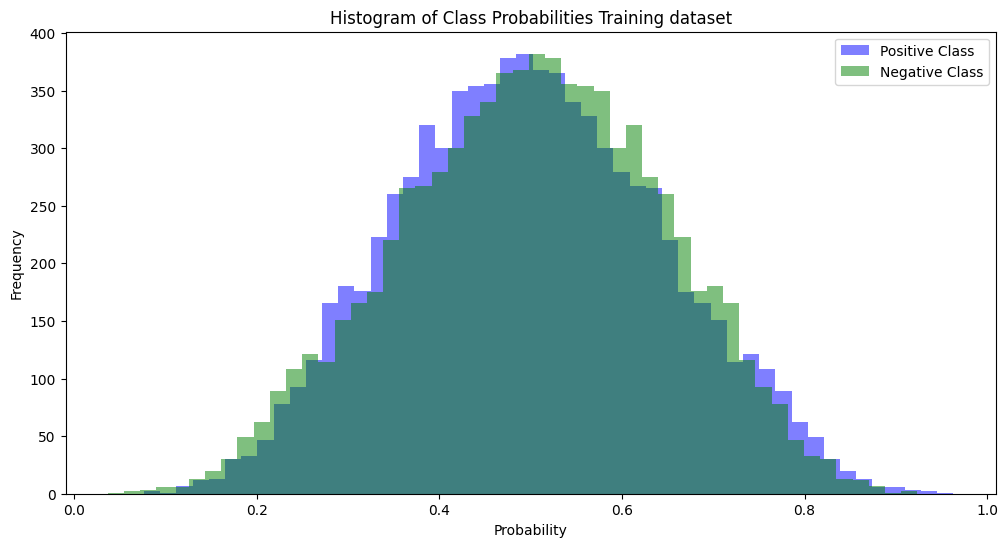

In [70]:
model.eval()
output = model.forward(torch.tensor(trainingData, dtype=torch.float32, device='cuda')) #Probabilites 

# Probabilities for the negative class
prob_negative_class = 1 - output


output = output.detach().cpu().numpy().flatten()  # Probabilities of positive class
prob_negative_class = prob_negative_class.detach().cpu().numpy().flatten()  # Probabilities of negative class

# Plotting
plt.figure(figsize=(12, 6))

plt.hist(output, bins=50, alpha=0.5, color='blue', label='Positive Class')
plt.hist(prob_negative_class, bins=50, alpha=0.5, color='green', label='Negative Class')

plt.title('Histogram of Class Probabilities Training dataset')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()

plt.show()




C:\Users\Juan\AppData\Local\Temp\ipykernel_23904\3646570589.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)


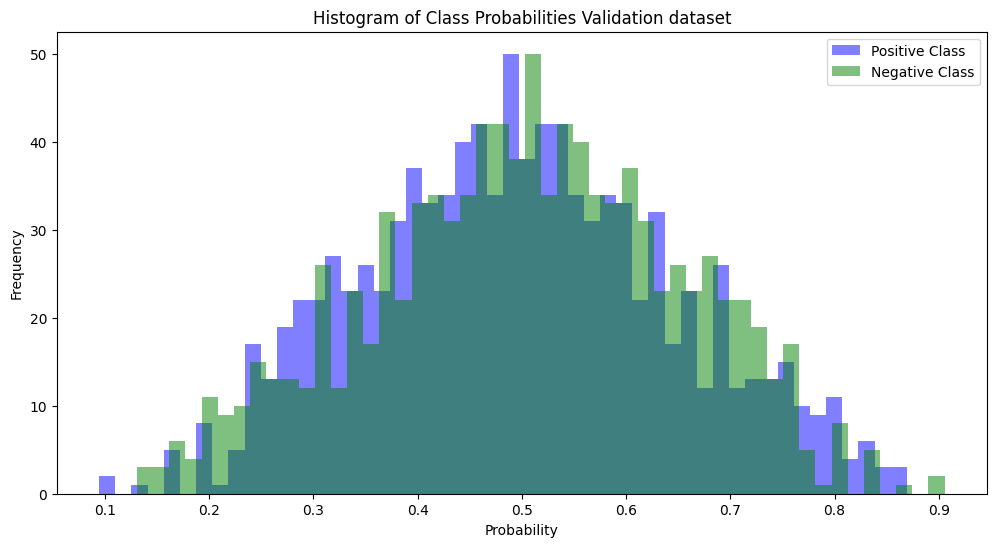

In [71]:
model.eval()
output = model.forward(torch.tensor(validationData, dtype=torch.float32, device='cuda')) #Probabilites 

# Probabilities for the negative class
prob_negative_class = 1 - output


output = output.detach().cpu().numpy().flatten()  # Probabilities of positive class
prob_negative_class = prob_negative_class.detach().cpu().numpy().flatten()  # Probabilities of negative class

# Plotting
plt.figure(figsize=(12, 6))

plt.hist(output, bins=50, alpha=0.5, color='blue', label='Positive Class')
plt.hist(prob_negative_class, bins=50, alpha=0.5, color='green', label='Negative Class')

plt.title('Histogram of Class Probabilities Validation dataset')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()

plt.show()

C:\Users\Juan\AppData\Local\Temp\ipykernel_23904\3646570589.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)


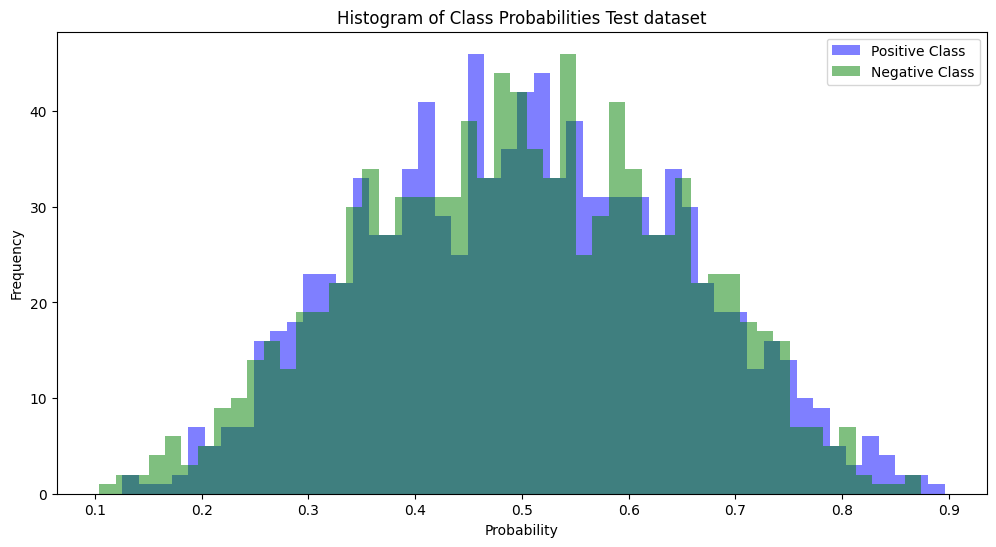

In [72]:
model.eval()
output = model.forward(torch.tensor(testData, dtype=torch.float32, device='cuda')) #Probabilites 

# Probabilities for the negative class
prob_negative_class = 1 - output


output = output.detach().cpu().numpy().flatten()  # Probabilities of positive class
prob_negative_class = prob_negative_class.detach().cpu().numpy().flatten()  # Probabilities of negative class

# Plotting
plt.figure(figsize=(12, 6))

plt.hist(output, bins=50, alpha=0.5, color='blue', label='Positive Class')
plt.hist(prob_negative_class, bins=50, alpha=0.5, color='green', label='Negative Class')

plt.title('Histogram of Class Probabilities Test dataset')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()

plt.show()

C:\Users\Juan\AppData\Local\Temp\ipykernel_23904\3646570589.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)


Training Sensitivity (True Positive Rate): 0.6042606516290727
Training Specificity (True Negative Rate): 0.6321695760598504
Test Sensitivity (True Positive Rate): 0.53515625
Test Specificity (True Negative Rate): 0.5204918032786885
Validation Sensitivity (True Positive Rate): 0.4839357429718876
Validation Specificity (True Negative Rate): 0.5298804780876494


C:\Users\Juan\AppData\Local\Temp\ipykernel_23904\3646570589.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)
C:\Users\Juan\AppData\Local\Temp\ipykernel_23904\3646570589.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)


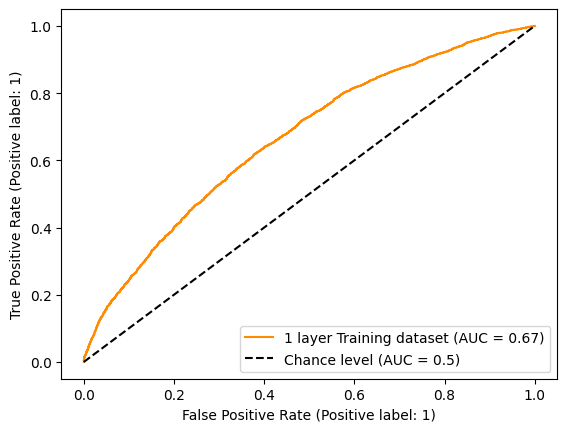

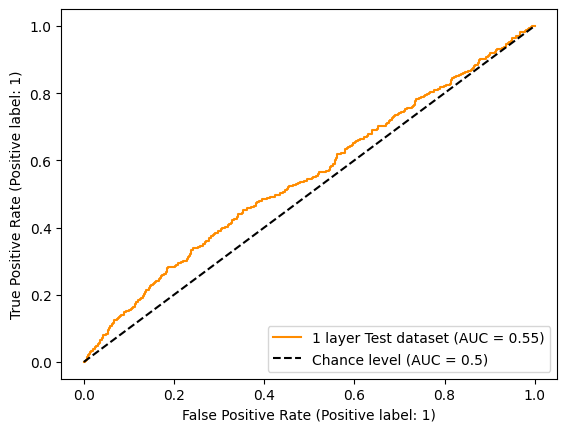

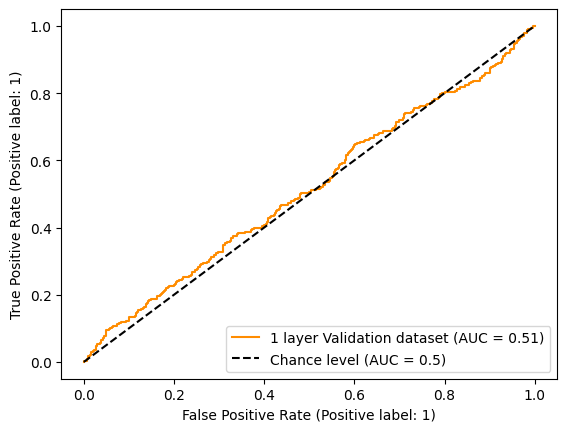

In [84]:
#       1 layer model

model.eval()

#       Training dataset
# Forward pass to get probabilities
output_tensor = model(torch.tensor(trainingData, dtype=torch.float32, device='cuda'))
predicted_probabilities = output_tensor.detach().cpu().numpy().flatten()

# Apply threshold to get predicted classes
predicted_classes = (predicted_probabilities > 0.5).astype(int)
cm = confusion_matrix(trainingLabels, predicted_classes)

# Extracting true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = cm.ravel()

# Calculating sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Training Sensitivity (True Positive Rate):", sensitivity)
print("Training Specificity (True Negative Rate):", specificity)

RocCurveDisplay.from_predictions(
    trainingLabels,
    predicted_probabilities, 
    name="1 layer Training dataset",
    color="darkorange",
    plot_chance_level=True,
)




#       test dataset
# Forward pass to get probabilities
output_tensor = model(torch.tensor(testData, dtype=torch.float32, device='cuda'))
predicted_probabilities = output_tensor.detach().cpu().numpy().flatten()

# Apply threshold to get predicted classes
predicted_classes = (predicted_probabilities > 0.5).astype(int)
cm = confusion_matrix(testLabels, predicted_classes)

# Extracting true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = cm.ravel()

# Calculating sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)


RocCurveDisplay.from_predictions(
    testLabels,
    predicted_probabilities, 
    name="1 layer Test dataset",
    color="darkorange",
    plot_chance_level=True,
)

print("Test Sensitivity (True Positive Rate):", sensitivity)
print("Test Specificity (True Negative Rate):", specificity)


#       Validation dataset
# Forward pass to get probabilities
output_tensor = model(torch.tensor(validationData, dtype=torch.float32, device='cuda'))
predicted_probabilities = output_tensor.detach().cpu().numpy().flatten()

# Apply threshold to get predicted classes
predicted_classes = (predicted_probabilities > 0.5).astype(int)
cm = confusion_matrix(validationLabels, predicted_classes)

# Extracting true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = cm.ravel()

# Calculating sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)


RocCurveDisplay.from_predictions(
    validationLabels,
    predicted_probabilities, 
    name="1 layer Validation dataset",
    color="darkorange",
    plot_chance_level=True,
)

print("Validation Sensitivity (True Positive Rate):", sensitivity)
print("Validation Specificity (True Negative Rate):", specificity)

In [24]:
# Normalize data
scaler = StandardScaler()
trainingData = scaler.fit_transform(trainingData)
validationData = scaler.transform(validationData)
testData = scaler.transform(testData)

model2 = MyNetwork(trainingData.shape[1])
model2.trainModel(trainingData, trainingLabels, validationData, validationLabels, 'log/layer1')
model2.save('FinalModel_1layer') #This is actually not the 1 layer neural network

C:\Users\Juan\AppData\Local\Temp\ipykernel_23904\1387368573.py:21: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  x = torch.tensor(x, dtype=torch.float32)
C:\Users\Juan\AppData\Local\Temp\ipykernel_23904\1387368573.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)


Epoch 1/250 - Loss: 0.6999 - Accuracy: 49.54%
Epoch 2/250 - Loss: 0.6991 - Accuracy: 49.85%
Epoch 3/250 - Loss: 0.6983 - Accuracy: 50.08%
Epoch 4/250 - Loss: 0.6976 - Accuracy: 50.15%
Epoch 5/250 - Loss: 0.6969 - Accuracy: 50.56%
Epoch 6/250 - Loss: 0.6963 - Accuracy: 50.61%
Epoch 7/250 - Loss: 0.6956 - Accuracy: 50.90%
Epoch 8/250 - Loss: 0.6950 - Accuracy: 51.18%
Epoch 9/250 - Loss: 0.6944 - Accuracy: 51.43%
Epoch 10/250 - Loss: 0.6939 - Accuracy: 51.61%
Epoch 11/250 - Loss: 0.6933 - Accuracy: 51.79%
Epoch 12/250 - Loss: 0.6928 - Accuracy: 51.95%
Epoch 13/250 - Loss: 0.6922 - Accuracy: 52.05%
Epoch 14/250 - Loss: 0.6917 - Accuracy: 52.38%
Epoch 15/250 - Loss: 0.6912 - Accuracy: 52.69%
Epoch 16/250 - Loss: 0.6907 - Accuracy: 52.94%
Epoch 17/250 - Loss: 0.6901 - Accuracy: 52.96%
Epoch 18/250 - Loss: 0.6896 - Accuracy: 53.05%
Epoch 19/250 - Loss: 0.6891 - Accuracy: 53.28%
Epoch 20/250 - Loss: 0.6886 - Accuracy: 53.49%
Epoch 21/250 - Loss: 0.6881 - Accuracy: 53.73%
Epoch 22/250 - Loss: 0

C:\Users\Juan\AppData\Local\Temp\ipykernel_23904\1387368573.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)


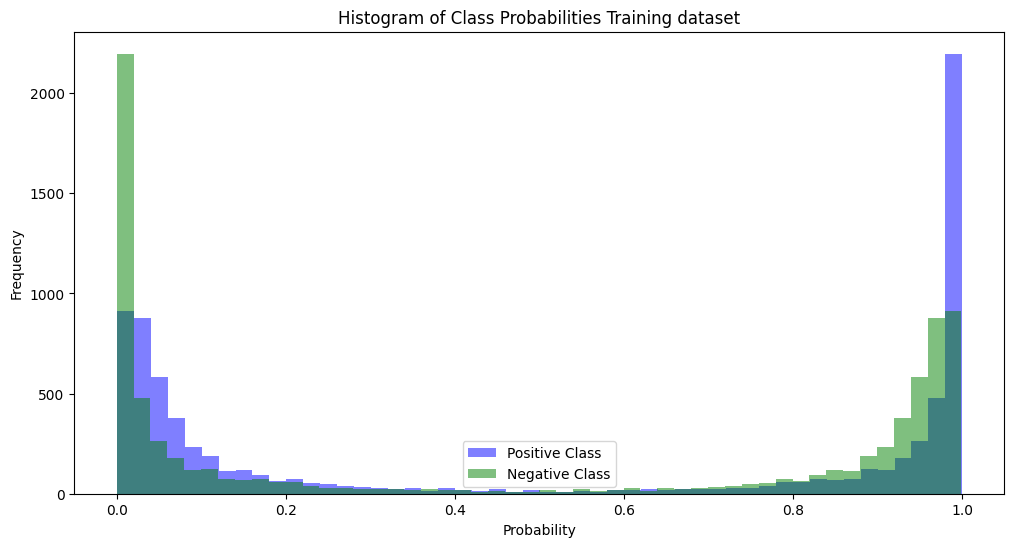

In [80]:
model2.eval()
output = model2.forward(torch.tensor(trainingData, dtype=torch.float32, device='cuda')) #Probabilites 

# Probabilities for the negative class
prob_negative_class = 1 - output

output = output.detach().cpu().numpy().flatten()  # Probabilities of positive class
prob_negative_class = prob_negative_class.detach().cpu().numpy().flatten()  # Probabilities of negative class

# Plotting
plt.figure(figsize=(12, 6))

plt.hist(output, bins=50, alpha=0.5, color='blue', label='Positive Class')
plt.hist(prob_negative_class, bins=50, alpha=0.5, color='green', label='Negative Class')

plt.title('Histogram of Class Probabilities Training dataset')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()

plt.show()


C:\Users\Juan\AppData\Local\Temp\ipykernel_23904\1387368573.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)


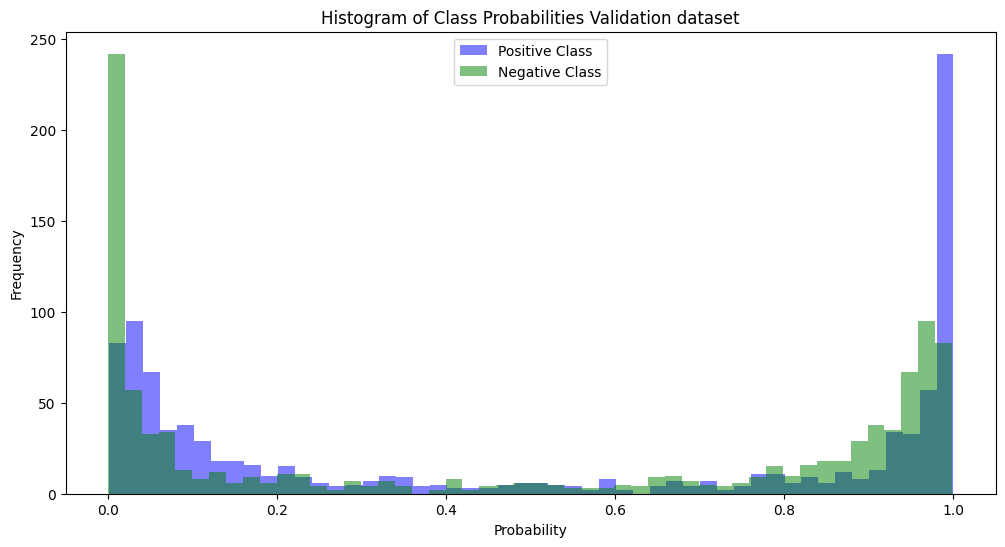

In [81]:
model2.eval()
output = model2.forward(torch.tensor(validationData, dtype=torch.float32, device='cuda')) #Probabilites 

# Probabilities for the negative class
prob_negative_class = 1 - output


output = output.detach().cpu().numpy().flatten()  # Probabilities of positive class
prob_negative_class = prob_negative_class.detach().cpu().numpy().flatten()  # Probabilities of negative class

# Plotting
plt.figure(figsize=(12, 6))

plt.hist(output, bins=50, alpha=0.5, color='blue', label='Positive Class')
plt.hist(prob_negative_class, bins=50, alpha=0.5, color='green', label='Negative Class')

plt.title('Histogram of Class Probabilities Validation dataset')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()

plt.show()

C:\Users\Juan\AppData\Local\Temp\ipykernel_23904\1387368573.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)


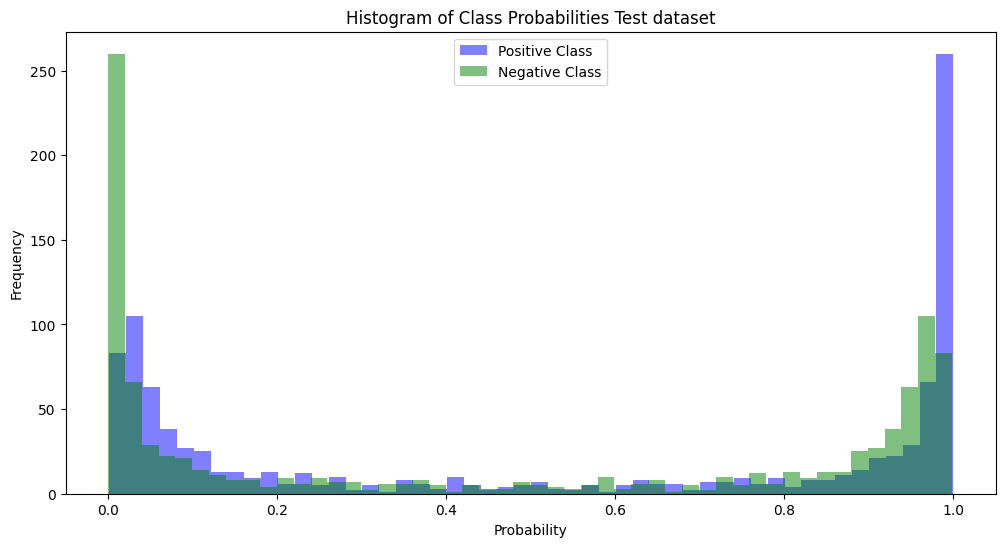

In [83]:
model2.eval()
output = model2.forward(torch.tensor(testData, dtype=torch.float32, device='cuda')) #Probabilites 

# Probabilities for the negative class
prob_negative_class = 1 - output


output = output.detach().cpu().numpy().flatten()  # Probabilities of positive class
prob_negative_class = prob_negative_class.detach().cpu().numpy().flatten()  # Probabilities of negative class

# Plotting
plt.figure(figsize=(12, 6))

plt.hist(output, bins=50, alpha=0.5, color='blue', label='Positive Class')
plt.hist(prob_negative_class, bins=50, alpha=0.5, color='green', label='Negative Class')

plt.title('Histogram of Class Probabilities Test dataset')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()

plt.show()

C:\Users\Juan\AppData\Local\Temp\ipykernel_23904\1387368573.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)
C:\Users\Juan\AppData\Local\Temp\ipykernel_23904\1387368573.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)
C:\Users\Juan\AppData\Local\Temp\ipykernel_23904\1387368573.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)


Training Sensitivity (True Positive Rate): 0.9857142857142858
Training Specificity (True Negative Rate): 0.9875311720698254
Test Sensitivity (True Positive Rate): 0.951171875
Test Specificity (True Negative Rate): 0.9200819672131147
Validation Sensitivity (True Positive Rate): 0.9357429718875502
Validation Specificity (True Negative Rate): 0.9362549800796812


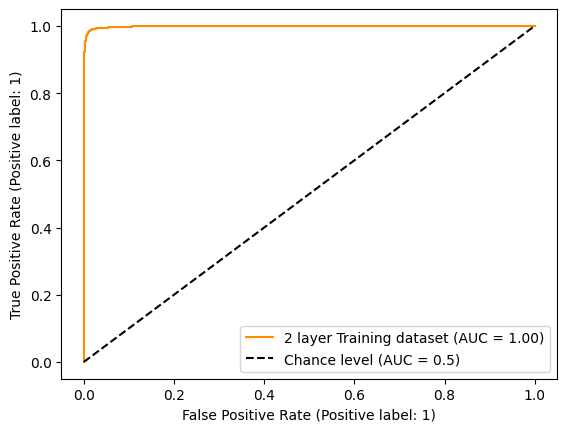

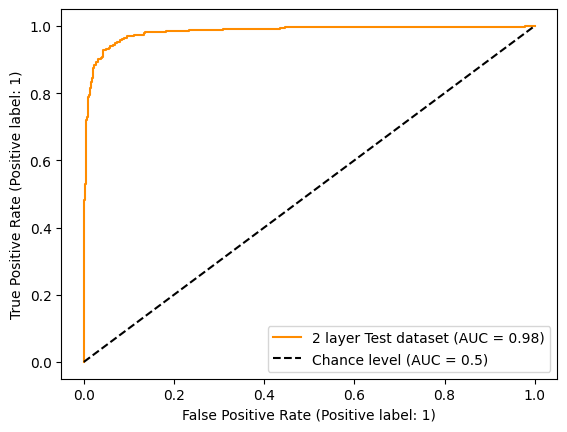

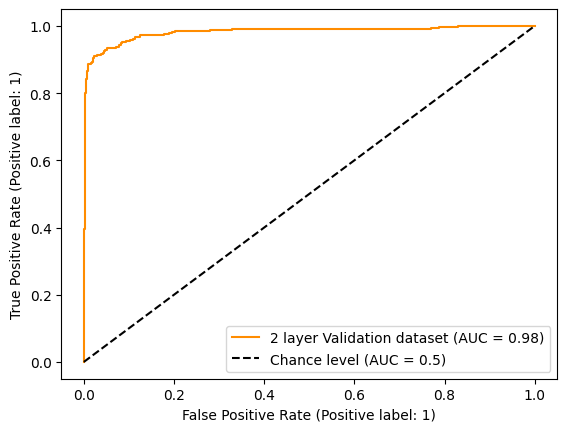

In [85]:
model2.eval()

#       Training dataset
# Forward pass to get probabilities
output_tensor = model2(torch.tensor(trainingData, dtype=torch.float32, device='cuda'))
predicted_probabilities = output_tensor.detach().cpu().numpy().flatten()

# Apply threshold to get predicted classes
predicted_classes = (predicted_probabilities > 0.5).astype(int)
cm = confusion_matrix(trainingLabels, predicted_classes)

# Extracting true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = cm.ravel()

# Calculating sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

RocCurveDisplay.from_predictions(
    trainingLabels,
    predicted_probabilities, 
    name="2 layer Training dataset",
    color="darkorange",
    plot_chance_level=True,
)


print("Training Sensitivity (True Positive Rate):", sensitivity)
print("Training Specificity (True Negative Rate):", specificity)



#       test dataset
# Forward pass to get probabilities
output_tensor = model2(torch.tensor(testData, dtype=torch.float32, device='cuda'))
predicted_probabilities = output_tensor.detach().cpu().numpy().flatten()

# Apply threshold to get predicted classes
predicted_classes = (predicted_probabilities > 0.5).astype(int)
cm = confusion_matrix(testLabels, predicted_classes)

# Extracting true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = cm.ravel()

# Calculating sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

RocCurveDisplay.from_predictions(
    testLabels,
    predicted_probabilities, 
    name="2 layer Test dataset",
    color="darkorange",
    plot_chance_level=True,
)


print("Test Sensitivity (True Positive Rate):", sensitivity)
print("Test Specificity (True Negative Rate):", specificity)


#       Validation dataset
# Forward pass to get probabilities
output_tensor = model2(torch.tensor(validationData, dtype=torch.float32, device='cuda'))
predicted_probabilities = output_tensor.detach().cpu().numpy().flatten()

# Apply threshold to get predicted classes
predicted_classes = (predicted_probabilities > 0.5).astype(int)
cm = confusion_matrix(validationLabels, predicted_classes)

# Extracting true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = cm.ravel()

# Calculating sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

RocCurveDisplay.from_predictions(
    validationLabels,
    predicted_probabilities, 
    name="2 layer Validation dataset",
    color="darkorange",
    plot_chance_level=True,
)

print("Validation Sensitivity (True Positive Rate):", sensitivity)
print("Validation Specificity (True Negative Rate):", specificity)

In [6]:
if torch.cuda.is_available():
    for i in range(torch.cuda.device_count()):
        print(f"Device {i}: {torch.cuda.get_device_name(i)}")
else:
    print("No CUDA devices available.")


Device 0: NVIDIA GeForce RTX 3080
